In [2]:

'''2.⁠ ⁠Data Cleaning:

Handle missing data by either imputing or removing missing values.

Detect and handle outliers (use IQR or Z-score methods).

Encode categorical variables (e.g., one-hot or label encoding).

Scale numerical features if necessary (use MinMaxScaler or StandardScaler).'''


'1.\u2060 \u2060Data Cleaning:\n\nHandle missing data by either imputing or removing missing values.\n\nDetect and handle outliers (use IQR or Z-score methods).\n\nEncode categorical variables (e.g., one-hot or label encoding).\n\nScale numerical features if necessary (use MinMaxScaler or StandardScaler).'

In [3]:

import pandas as pd
file="Housing.csv"
housing_data = pd.read_csv(file)


In [4]:
#Handling Outliers
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for numerical columns
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cleaned_data = housing_data.copy()

for col in numerical_cols:
    cleaned_data = remove_outliers_iqr(cleaned_data, col)


In [5]:
print(f"Original size: {housing_data.shape[0]}")
print(f"Cleaned size: {cleaned_data.shape[0]}")

Original size: 545
Cleaned size: 365


In [6]:
cleaned_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,furnished
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
40,7875000,6550,3,1,2,yes,no,yes,no,yes,0,yes,furnished


In [7]:
#Using one hot encoding for multi_class variables
cleaned_data=pd.get_dummies(cleaned_data,columns=['furnishingstatus'], drop_first=True)

In [8]:
#Using Label encoding for binary variables
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    cleaned_data[col] = cleaned_data[col].map({'yes': 1, 'no': 0})
print(cleaned_data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000         4          1        2         1          0   
20  8750000  4320         3          1        2         1          0   
22  8645000  8050         3          1        1         1          1   
27  8400000  8875         3          1        1         1          0   
40  7875000  6550         3          1        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
15         1                0                0        2         0   
20         1                1                0        2         0   
22         1                0                1        1         0   
27         0                0                0        1         0   
40         1                0                1        0         1   

    furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
15                             True                         False  
20              

In [9]:
#Using MinmaxScaler for scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cleaned_data[numerical_cols] = scaler.fit_transform(cleaned_data[numerical_cols])

# Display the scaled data
print(cleaned_data.head())

       price      area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  1.000000  0.499426  1.000000        0.0      0.5         1          0   
20  0.952381  0.306544  0.666667        0.0      0.5         1          0   
22  0.938095  0.734788  0.666667        0.0      0.0         1          1   
27  0.904762  0.829506  0.666667        0.0      0.0         1          0   
40  0.833333  0.562572  0.666667        0.0      0.5         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
15         1                0                0      1.0         0   
20         1                1                0      1.0         0   
22         1                0                1      0.5         0   
27         0                0                0      0.5         0   
40         1                0                1      0.0         1   

    furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
15                             True                   

In [ ]:
'''3.⁠ ⁠EDA:

Analyze the distribution of the target variable (price).

Visualize relationships between features and price using scatter plots, correlation heatmaps, etc.

Check for multicollinearity and identify key features.
'''

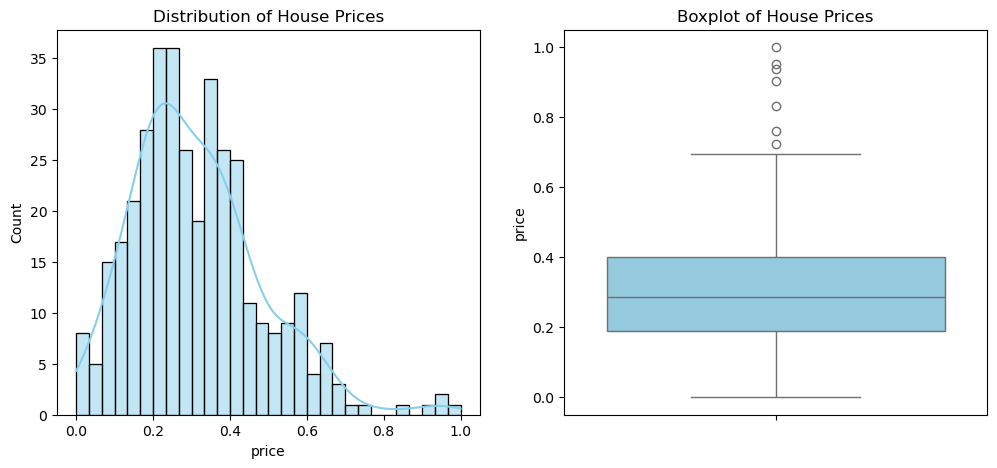

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#histogram and boxplot for price
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(cleaned_data['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of House Prices')

plt.subplot(1, 2, 2)
sns.boxplot(y=cleaned_data['price'], color='skyblue')
plt.title('Boxplot of House Prices')

plt.show()


/var/folders/2m/71fn6f7x5pz9lxqn61pcx4c00000gp/T/ipykernel_30555/1595245368.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cleaned_data['stories'], y=cleaned_data['price'], palette="coolwarm")


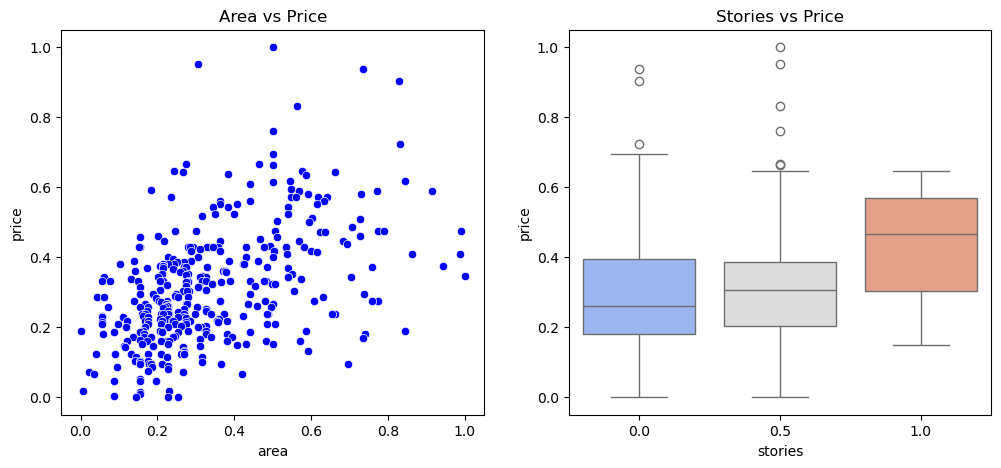

In [21]:
# Scatter plots for numerical features vs. price
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=cleaned_data['area'], y=cleaned_data['price'], color='blue')
plt.title('Area vs Price')

plt.subplot(1, 2, 2)
sns.boxplot(x=cleaned_data['stories'], y=cleaned_data['price'], palette="coolwarm")
plt.title('Stories vs Price')

plt.show()


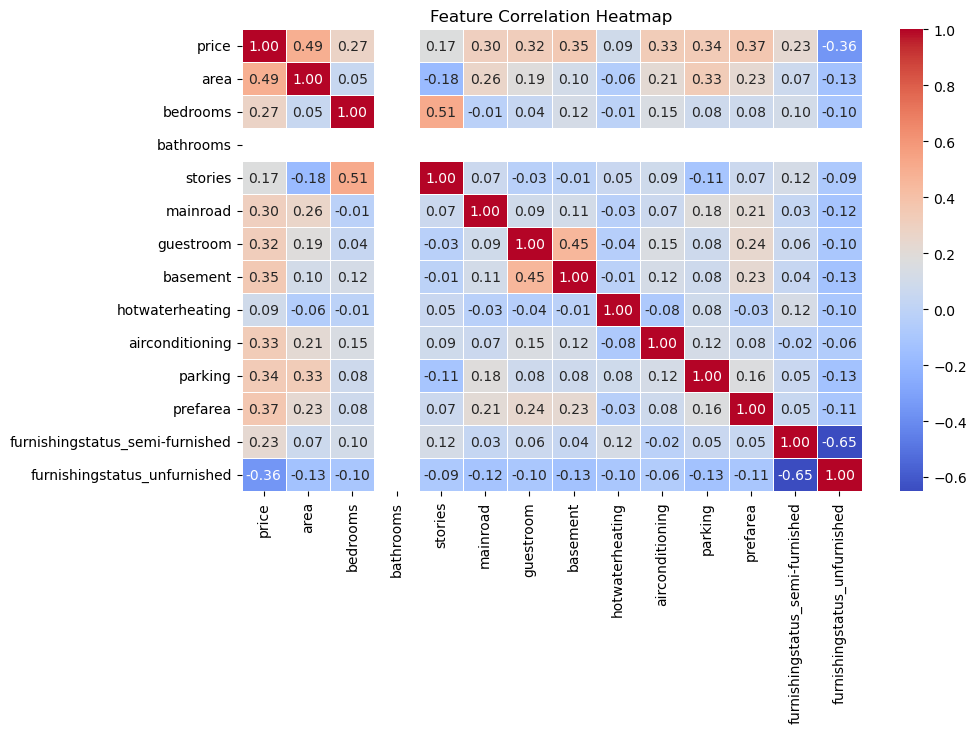

In [23]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
'''4.⁠ ⁠Train-Test Split:

Split the dataset into training (80%) and testing (20%) sets.

'''

In [25]:
from sklearn.model_selection import train_test_split


X = cleaned_data.drop(columns=['price'])  # Features
y = cleaned_data['price']  # Target variable

#80%train 20%test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check dataset shapes
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (292, 13), Testing set: (73, 13)


In [ ]:
''''5.⁠ ⁠Model Training:

Train a multiple linear regression model using scikit-learn.

'''

In [27]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)

# Print model coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Model Coefficients: [ 0.25500896  0.0454884   0.          0.08272342  0.03395028  0.04565305
  0.06611586  0.09298696  0.06492115  0.05290226  0.07322886 -0.01295292
 -0.07128451]
Intercept: 0.10099397948275554


In [ ]:
'''6.Evaluate the model using metrics like R² score, MAE, and MSE.

Compare results on both training and testing sets to check for overfitting or underfitting.

''''

In [29]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

print(f"Training R² Score: {train_r2:.3f}")
print(f"Testing R² Score: {test_r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")


Training R² Score: 0.571
Testing R² Score: 0.497
Mean Absolute Error (MAE): 0.096
Mean Squared Error (MSE): 0.020
